In [1]:
from create_data import DumbCirc as dc
from create_data_single import Dumb as d
from dklsuq import DeepKernelSUQ as dklu
from labelsq import LabeledSUQ as lsu
import matplotlib
import matplotlib.pyplot as plt
import torch

In [9]:
data_instance = dc(0.5, 0.5, 0.25, 2)
torch.manual_seed(2)
fc, fnc, pc, l, tc, lt = data_instance.create_dataset(50, 2, [50], [0.2], True)
fc, pc, l, tc, lt = torch.tensor(fc), torch.tensor(pc), torch.tensor(l), torch.tensor(tc), torch.tensor(lt)

In [10]:
device = "cpu"

Text(0.5, 1.0, 'Two Circles')

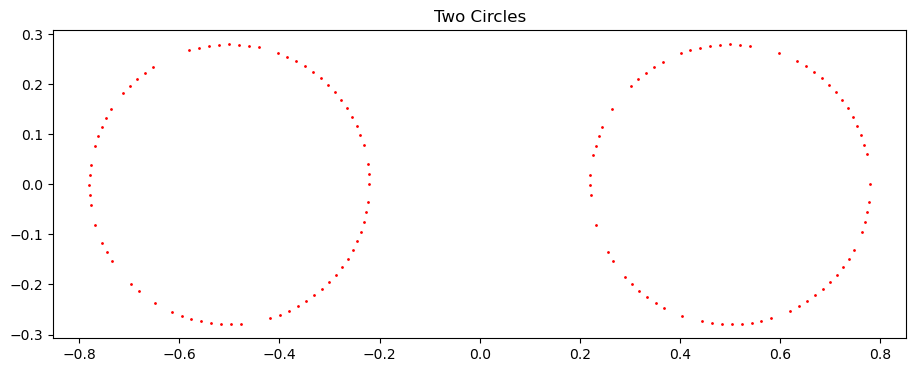

In [12]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.scatter(fc[1].cpu().numpy()[:, 0], fc[1].cpu().numpy()[:, 1], c='r', s=1)
ax.axis('equal')
ax.set_title(f'Two Circles')

In [4]:
model_dkl = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
model_dkl.train_with_mapping_encoding(num_epochs=20, batch_size=20, learning_rate=0.0001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\dklsuq.py:213: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 0.014452120289206505
Epoch:1, Loss: 0.017490847408771514
Epoch:2, Loss: 0.016613681688904765
Epoch:3, Loss: 0.016547764629125595
Epoch:4, Loss: 0.01580737754255533
Epoch:5, Loss: 0.015450621469914914
Epoch:6, Loss: 0.014798289812922477
Epoch:7, Loss: 0.014588883835041522
Epoch:8, Loss: 0.01445165271668911
Epoch:9, Loss: 0.014238690761445521
Epoch:10, Loss: 0.014142441151582908
Epoch:11, Loss: 0.014273742690293731
Epoch:12, Loss: 0.013552257141393173
Epoch:13, Loss: 0.013425618466421315
Epoch:14, Loss: 0.013214186031457653
Epoch:15, Loss: 0.013203678133355951
Epoch:16, Loss: 0.013362171583328123
Epoch:17, Loss: 0.013126942978889439
Epoch:18, Loss: 0.013022808488029381
Epoch:19, Loss: 0.012810167696241168


In [6]:
model_dkl.set_test_data(tc)

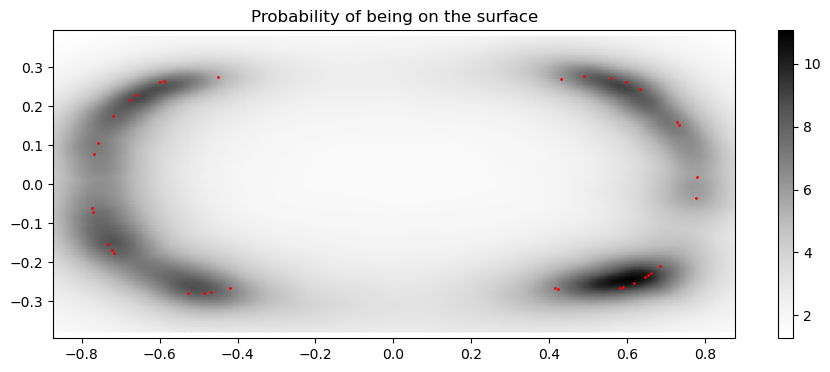

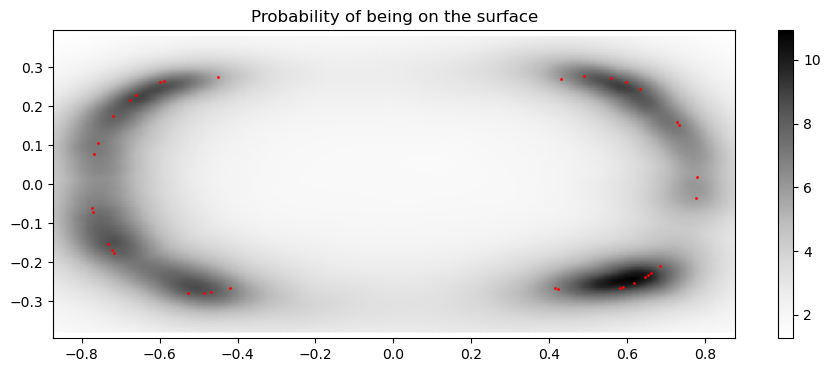

In [7]:
model_dkl.predict(do_mapping=True, encoding_only=True)

In [8]:
model_dkl.set_test_data(pc[2:4, :])

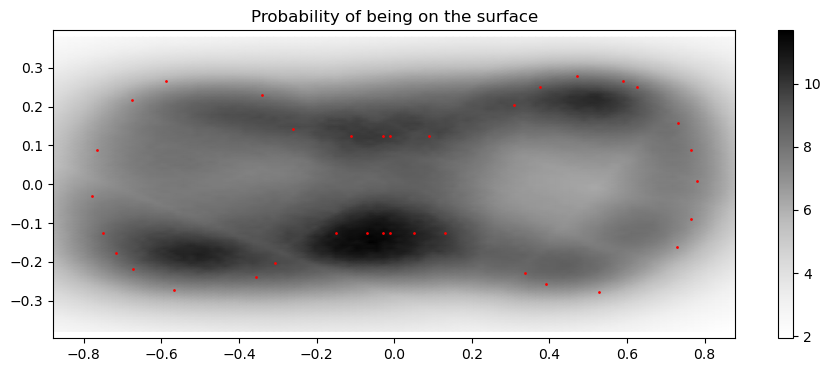

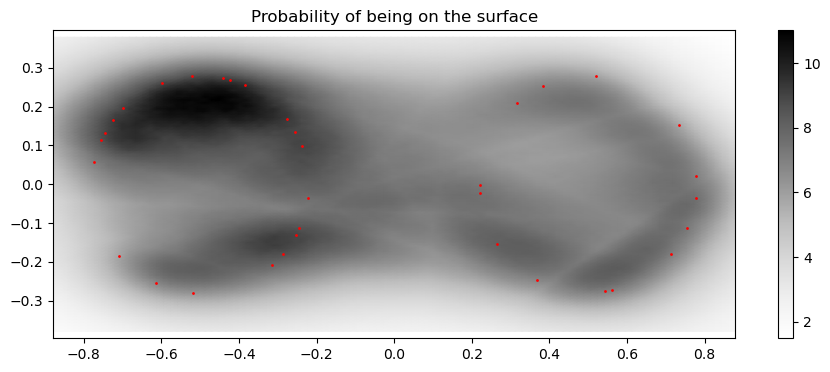

In [9]:
model_dkl.predict(do_mapping=True, encoding_only=True)

In [10]:
model_dkl2 = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [ ]:
model_dkl2.train_with_mapping(num_epochs=20, batch_size=20, learning_rate=0.0001)

Covariance Matrix:  tensor([[1.0000e+00, 5.0438e-04, 1.1352e-01,  ..., 5.0636e-04, 1.6302e-01,
         3.2402e-05],
        [5.0438e-04, 1.0000e+00, 6.1508e-02,  ..., 9.9995e-01, 7.6291e-03,
         2.4458e-04],
        [1.1352e-01, 6.1508e-02, 1.0000e+00,  ..., 6.1633e-02, 1.5059e-01,
         1.3801e-03],
        ...,
        [5.0636e-04, 9.9995e-01, 6.1633e-02,  ..., 1.0000e+00, 7.6534e-03,
         2.4464e-04],
        [1.6302e-01, 7.6291e-03, 1.5059e-01,  ..., 7.6534e-03, 9.9991e-01,
         2.3475e-06],
        [3.2402e-05, 2.4458e-04, 1.3801e-03,  ..., 2.4464e-04, 2.3475e-06,
         1.0000e+00]], grad_fn=<AddBackward0>)
Posterior Variance:  tensor([[ 6.3224e-01, -4.7579e-07,  2.8791e-02,  ..., -7.2216e-06,
         -3.3455e-06,  9.6840e-05],
        [-4.7812e-07,  9.7599e-03,  6.5342e-05,  ...,  9.3557e-03,
         -2.3367e-05,  1.2049e-07],
        [ 2.8791e-02,  6.5178e-05,  9.2790e-01,  ...,  5.1954e-04,
          2.0960e-03,  2.3897e-03],
        ...,
        [-7.2265e

In [13]:
model_dkl2.set_test_data(tc)

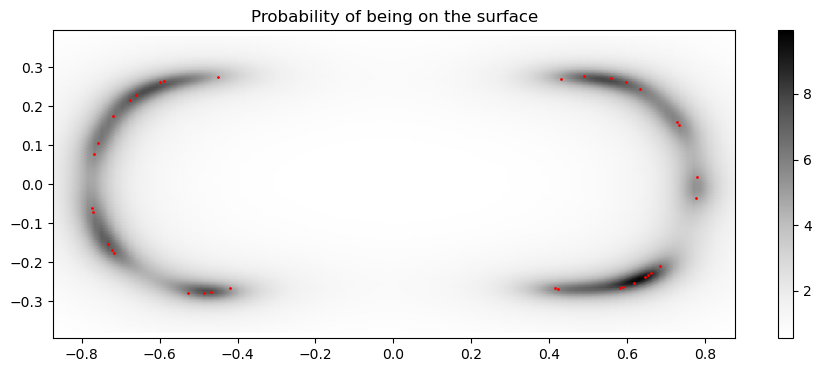

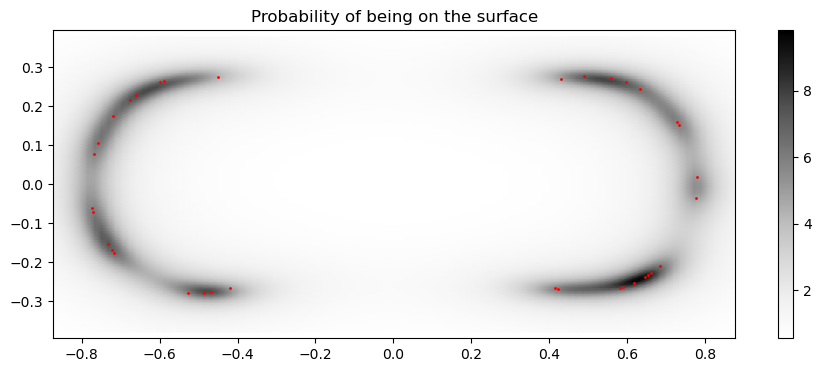

In [14]:
model_dkl2.predict(do_mapping=True)

In [15]:
model_dkl2.set_test_data(pc[2:4, :])

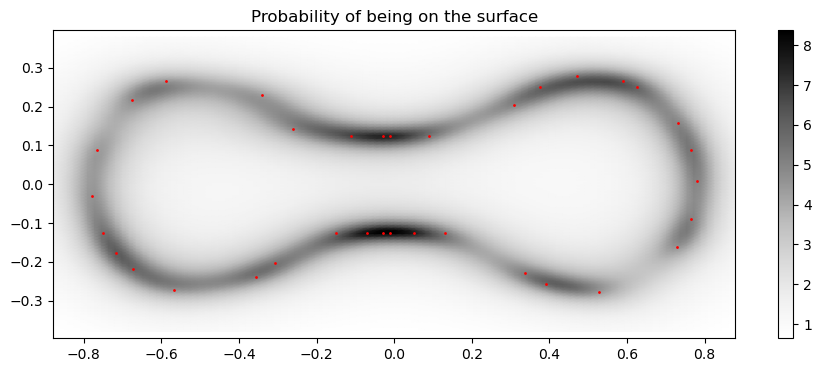

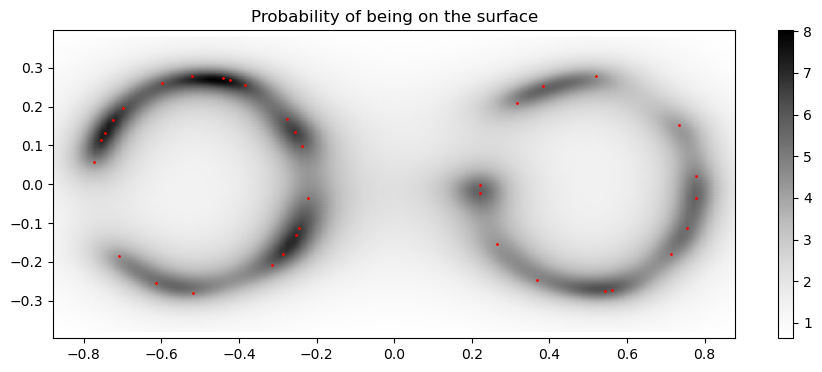

In [16]:
model_dkl2.predict(do_mapping=True)